In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import scipy 
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d


In [2]:
iris = datasets.load_iris()
#sepal length, sepal width, petal length, petal width
X = iris.data[:, :]  
#0: setosa, 1: versicolor, 2:virginica
y = iris.target

# Iris GMM

For this section of the homework we are using a Gaussian Mixture Model to cluster the Iris data set. We let the model fit to the data set and predict the clusters. By comparing the prediction from the model to the actual label values we can get the accuracy of the model.

The trickiest part of this is to make the model labels line up in order of the data labels. It will cluster all of the data from 0-2, but in no particular order (so 1 could be the first set of labels for a cluster instead of 0). I found a random state to make the labels in the order we want - it works on my computer... but check the prediction array to see if the labels are ordered correctly.

In [3]:
gm = GaussianMixture(n_components=3, random_state = 18)
gm.fit(X)
predy = gm.predict(X)
print(predy)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
print("Accuracy = " + str(np.sum(predy == y)/len(predy)))

Accuracy = 0.9666666666666667


# Make Blobs

In [5]:
blob_centers = np.array([[ 0.2,  2.3],[-1.5 ,  2.3],[-2.8,  1.8],[-2.8,  2.8],[-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,cluster_std=blob_std, n_features=5,random_state=0)


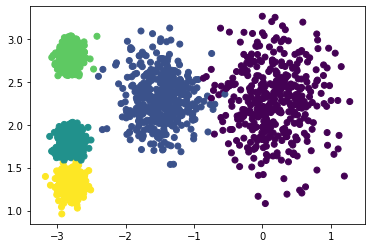

In [6]:
plt.scatter(X[:,0],X[:,1], c = y);

In [7]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
predy = kmeans.predict(X)


Centriods
[[-2.80180006  2.79464334]
 [ 0.17864202  2.27506362]
 [-2.80379109  1.30017997]
 [-1.46332098  2.31083369]
 [-2.80446936  1.79959228]]


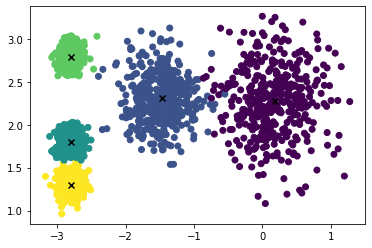

In [8]:
centers = kmeans.cluster_centers_
print("Centriods")
print(centers)

plt.scatter(X[:,0],X[:,1], c = y);
plt.scatter(centers[:,0],centers[:,1], marker = "x", c = "black");

In [9]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 0, 0], dtype=int32)

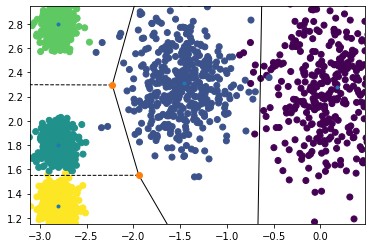

In [10]:
vor = Voronoi(centers)
voronoi_plot_2d(vor)
plt.scatter(X[:,0],X[:,1], c = y);

# Intertia Study

For k=3 we get an inertia value of ~646 and k = 8 we get ~121. This means that 8 clusters was a better fit than 3 since it had a lower inertia value or average value between a point in a cluster to its centriod.

After, k from 2-20 was generated and plotted. From the graph we see k=4 is the elbow values when the inertia drops off.

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.inertia_

646.2302690556883

In [12]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
kmeans.inertia_

121.5464266045163

In [13]:
inertia = []
for i in range (2,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    

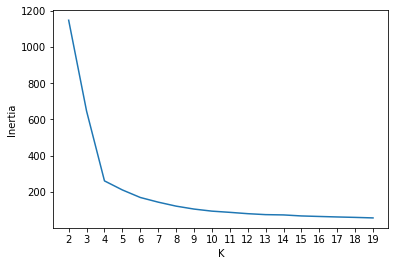

In [14]:
k = np.arange(2,20,1)
plt.plot(k,inertia)
plt.xticks(k)
plt.ylabel("Inertia")
plt.xlabel("K");
